# Jaringan - LKS
 Praktek NLP

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle


%matplotlib inline

# 01 Data Acquisition


In [25]:
data = pd.read_csv('jaringanClean.csv')
data.drop(['text'],axis = 1,inplace = True)
data.rename(columns={'sentiment': 'Sentiment'}, inplace=True)
data

,Sentiment,clean_teks
0,positive,produk bangsa
1,positive,sakti alhamdulillah v
2,negative,selamat pagi bantu kamar sinyal hilang panggil...
3,negative,dear jaring data lot banget h
4,negative,selamat malam dusta
...,...,...
295,positive,pantesan lancar ya sinyal lancar lombok timur
296,positive,alhamdulillah lancar pakai
297,positive,untung pakai internet lancar ide
298,positive,ramai lokasi wisata jaya


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentiment   300 non-null    object
 1   clean_teks  297 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [27]:

data.dropna(inplace = True)
data.isnull().sum()

Sentiment     0
clean_teks    0
dtype: int64

In [28]:
print('Total Jumlah Sentimen:', data.shape[0], 'data\n')
print('terdiri dari (sentimen):')
print('-- [0] Positive\t:', data[data.Sentiment == 'positive'].shape[0], 'data')
print('-- [1] Negative\t:', data[data.Sentiment == 'negative'].shape[0], 'data')


Total Jumlah Sentimen: 297 data

terdiri dari (sentimen):
-- [0] Positive	: 137 data
-- [1] Negative	: 160 data


# 03 Feature Engineering

In [29]:
# Pisahkan kolom fitur dan target
X = data['clean_teks']
y = data['Sentiment']

In [30]:
X

0                                          produk bangsa
1                                  sakti alhamdulillah v
2      selamat pagi bantu kamar sinyal hilang panggil...
3                          dear jaring data lot banget h
4                                    selamat malam dusta
                             ...                        
295        pantesan lancar ya sinyal lancar lombok timur
296                           alhamdulillah lancar pakai
297                     untung pakai internet lancar ide
298                             ramai lokasi wisata jaya
299                      sinyal amsyong stadion gajayana
Name: clean_teks, Length: 297, dtype: object

In [31]:
y

0      positive
1      positive
2      negative
3      negative
4      negative
         ...   
295    positive
296    positive
297    positive
298    positive
299    negative
Name: Sentiment, Length: 297, dtype: object

## Feature Extraction (TF-IDF & N-Gram)
Proses mengubah teks menjadi vector menggunakan metode TF-IDF

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

TfidfVectorizer()

In [33]:
print(len(tf_idf.get_feature_names_out()))

619


In [34]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['acara' 'aceh' 'adhan' 'ajaib' 'ajar' 'akses' 'aksi' 'aktif' 'aktivitas'
 'alat' 'alhamdulillah' 'allah' 'aman' 'ampun' 'amsyong' 'an' 'anak' 'and'
 'andal' 'anjing' 'anjir' 'antek' 'apa' 'app' 'arae' 'area' 'arit'
 'artikel' 'asa' 'asik' 'astaga' 'asyik' 'ayo' 'baca' 'badai' 'bagi'
 'bagiberkah' 'bagus' 'bahan' 'baik' 'bajak' 'baju' 'bandung' 'banget'
 'bangsa' 'bangsat' 'bangunjiwo' 'bantu' 'bantul' 'bareng' 'batas'
 'baterai' 'bayar' 'bbm' 'beda' 'begini' 'bekas' 'bela' 'belah' 'belanja'
 'beli' 'benci' 'benerin' 'bentuk' 'berbagiberkah' 'beres' 'berita'
 'berkah' 'berkat' 'besar' 'betah' 'biar' 'bijak' 'bikin' 'bilang'
 'bisnis' 'boikot' 'bonus' 'browsing' 'brsatu' 'buang' 'buka' 'bukber'
 'bukti' 'bulan' 'bunyi' 'buru' 'buruk' 'busuk' 'cacat' 'camat' 'canggih'
 'cantik' 'care' 'cari' 'cek' 'ceo' 'cepat' 'chat' 'ciamis' 'cie' 'cimahi'
 'cisewu' 'ciwidey' 'coba' 'cocok' 'combo' 'cs' 'cuaca' 'curi' 'customer'
 'daerah' 'daftarin' 'dapat' 'darurat' 'data' 'deal' 'dear' 'deh' 'dengar'

In [35]:
X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf.head(100)

,acara,aceh,adhan,ajaib,ajar,akses,aksi,aktif,aktivitas,alat,...,wkp,wow,xd,ya,yess,yonder,youtube,youtubenya,yuk,zalim
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.338018,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.241525,0.0,0.0,0.0,0.000000,0.0,0.0


In [37]:
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

## Feature Selection (Chi Square)

In [38]:
X = np.array(data_tf_idf)
y = np.array(y)

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k=1000)
X_kbest_features = chi2_features.fit_transform(X, y)

print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 619
Reduced feature number: 619


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=1000 is greater than n_features=619. All the features will be returned.
  warnings.warn(


In [40]:
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.323715
1,0.407540
2,0.404290
3,0.028287
4,0.041755
...,...
614,0.375534
615,3.927151
616,0.289428
617,0.677420


In [41]:
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.323715,acara
1,0.407540,aceh
2,0.404290,adhan
3,0.028287,ajaib
4,0.041755,ajar
...,...,...
614,0.375534,yonder
615,3.927151,youtube
616,0.289428,youtubenya
617,0.677420,yuk


In [42]:
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
172,7.342380,gratis
300,7.135308,lancar
558,6.952387,terimakasih
341,5.005378,mantap
234,4.102689,jelek
...,...,...
522,0.000755,stabil
346,0.000568,masuk
428,0.000505,perdana
434,0.000012,ping


In [43]:
mask = chi2_features.get_support()
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [45]:
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['acara',
 'aceh',
 'adhan',
 'ajaib',
 'ajar',
 'akses',
 'aksi',
 'aktif',
 'aktivitas',
 'alat',
 'alhamdulillah',
 'allah',
 'aman',
 'ampun',
 'amsyong',
 'an',
 'anak',
 'and',
 'andal',
 'anjing',
 'anjir',
 'antek',
 'apa',
 'app',
 'arae',
 'area',
 'arit',
 'artikel',
 'asa',
 'asik',
 'astaga',
 'asyik',
 'ayo',
 'baca',
 'badai',
 'bagi',
 'bagiberkah',
 'bagus',
 'bahan',
 'baik',
 'bajak',
 'baju',
 'bandung',
 'banget',
 'bangsa',
 'bangsat',
 'bangunjiwo',
 'bantu',
 'bantul',
 'bareng',
 'batas',
 'baterai',
 'bayar',
 'bbm',
 'beda',
 'begini',
 'bekas',
 'bela',
 'belah',
 'belanja',
 'beli',
 'benci',
 'benerin',
 'bentuk',
 'berbagiberkah',
 'beres',
 'berita',
 'berkah',
 'berkat',
 'besar',
 'betah',
 'biar',
 'bijak',
 'bikin',
 'bilang',
 'bisnis',
 'boikot',
 'bonus',
 'browsing',
 'brsatu',
 'buang',
 'buka',
 'bukber',
 'bukti',
 'bulan',
 'bunyi',
 'buru',
 'buruk',
 'busuk',
 'cacat',
 'camat',
 'canggih',
 'cantik',
 'care',
 'cari',
 'cek',
 'ceo',
 'cep

In [46]:
kbest_feature = {} # Buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items():    # Iterasi untuk mengulangi vocab yang dihasilkan TF_IDF
  if k in selected_feature:                 # Cek apakah fitur termasuk k fitur yang diseleksi
    kbest_feature[k] = v                    # Jika iya, simpan fitur tersebut pada dictionary kosong diatas

In [47]:
kbest_feature

{'produk': 442,
 'bangsa': 44,
 'sakti': 474,
 'alhamdulillah': 10,
 'selamat': 487,
 'pagi': 412,
 'bantu': 47,
 'kamar': 249,
 'sinyal': 509,
 'hilang': 194,
 'panggil': 419,
 'darurat': 114,
 'dear': 117,
 'jaring': 230,
 'data': 115,
 'lot': 321,
 'banget': 43,
 'malam': 334,
 'dusta': 131,
 'tembak': 556,
 'paket': 415,
 'ganggu': 155,
 'ya': 612,
 'pakai': 414,
 'nya': 396,
 'off': 401,
 'ganti': 156,
 'gratis': 172,
 'youtube': 615,
 'senang': 493,
 'rt': 468,
 'kamus': 252,
 'perhapean': 429,
 'keluh': 266,
 'tanggap': 542,
 'bikin': 73,
 'emosi': 135,
 'pulsa': 451,
 'curi': 109,
 'soak': 516,
 'deh': 118,
 'kurang': 295,
 'iklan': 205,
 'pesan': 430,
 'sembunyi': 492,
 'mampus': 337,
 'puasa': 449,
 'subuh': 527,
 'sahur': 473,
 'cek': 95,
 'sedot': 483,
 'sisa': 511,
 'ribu': 466,
 'tolong': 569,
 'baca': 33,
 'coba': 104,
 'parah': 422,
 'koneksi': 283,
 'tuju': 575,
 'sila': 503,
 'boikot': 76,
 'langgan': 301,
 'dukung': 129,
 'bela': 57,
 'daftarin': 112,
 'kartu': 254,


In [48]:
data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,acara,aceh,adhan,ajaib,ajar,akses,aksi,aktif,aktivitas,alat,...,wkp,wow,xd,ya,yess,yonder,youtube,youtubenya,yuk,zalim
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.278903,0.0,0.0,0.0,0.0,0.0,0.0
293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
with open('kbest_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

In [50]:
'''
Supervised learning in Sklearn
https://scikit-learn.org/stable/supervised_learning.html
'''
from sklearn.neighbors import KNeighborsClassifier      # Pilih salah satu algoritma supervised learning. Contoh ini menggunakan algoritma Decision Tree
from sklearn.model_selection import train_test_split    # Digunakan untuk memisahkan data uji dan data latih
from joblib import dump                                 # Digunakan untuk menyimpan model yang telah dilatih

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2, random_state=40)

In [66]:
from sklearn.model_selection import GridSearchCV


# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the grid of parameters to search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # Example values for n_neighbors

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model after tuning
best_model = grid_search.best_estimator_

# Save the best model
dump(best_model, 'best_knn_model.joblib')

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'n_neighbors': 3}


In [67]:
algorithm = KNeighborsClassifier(n_neighbors=3)               # Load algoritma pembelajaran
model = algorithm.fit(X_train, y_train)   # Fitkan (latih) algoritma pada data latih & label latih

dump(model, filename='model_1.joblib')

['model_1.joblib']

In [68]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred = model.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred

array(['negative', 'positive', 'negative', 'negative', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive'],
      dtype=object)

In [69]:
# Tampilkan label sebenarnya pada data uji (actual label)
y_test# Tampilkan label sebenarnya pada data uji (actual label)
y_test

array(['negative', 'negative', 'negative', 'negative', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'negative', 'negative', 'positive', 'positive',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'negative', 'positive', 'negative', 'negative', 'negative',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'negative', 'positive', 'negative', 'positive', 'positive'],
      dtype=object)

# 05 Model Evaluation

In [70]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 47
Jumlah prediksi salah	: 13
Akurasi pengujian	: 78.33333333333333 %


In [71]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[24  4]
 [ 9 23]]


In [72]:
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred))

Classification report:
               precision    recall  f1-score   support

    negative       0.73      0.86      0.79        28
    positive       0.85      0.72      0.78        32

    accuracy                           0.78        60
   macro avg       0.79      0.79      0.78        60
weighted avg       0.79      0.78      0.78        60



In [73]:
from sklearn.model_selection import ShuffleSplit    # bisa pilih beberapa teknik cross validation
from sklearn.model_selection import cross_val_score # untuk mengetahui performa model pada cross validation

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy = (cross_val_score(model, X_kbest_features, y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

print('Akurasi setiap split:', cv_accuracy, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Akurasi setiap split: [0.8        0.81666667 0.75       0.83333333 0.81666667 0.73333333
 0.83333333 0.85       0.86666667 0.8       ] 

Rata-rata akurasi pada cross validation: 0.8100000000000002


In [86]:
import joblib

# Menyimpan model ke dalam file
joblib.dump(model, 'nlpJarinan.joblib')

['nlpJarinan.joblib']

# 07 WordCloud

In [79]:
import cv2
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [80]:
import requests

url = 'https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg'
response = requests.get(url)

with open ('cloud.jpg', 'wb') as file :
    file.write(response.content)

In [81]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

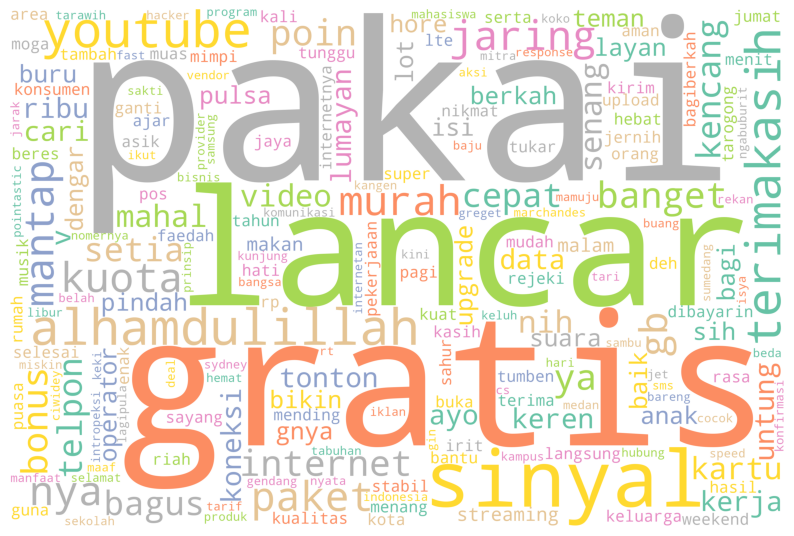

In [84]:


negative_comment = data[data.Sentiment == 'positive']
negative_string = []

for t in negative_comment.clean_teks:
  negative_string.append(t)

negative_string = pd.Series(negative_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, 
                                background_color='white', colormap='Set2', collocations=False, 
                                stopwords = STOPWORDS).generate(negative_string)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

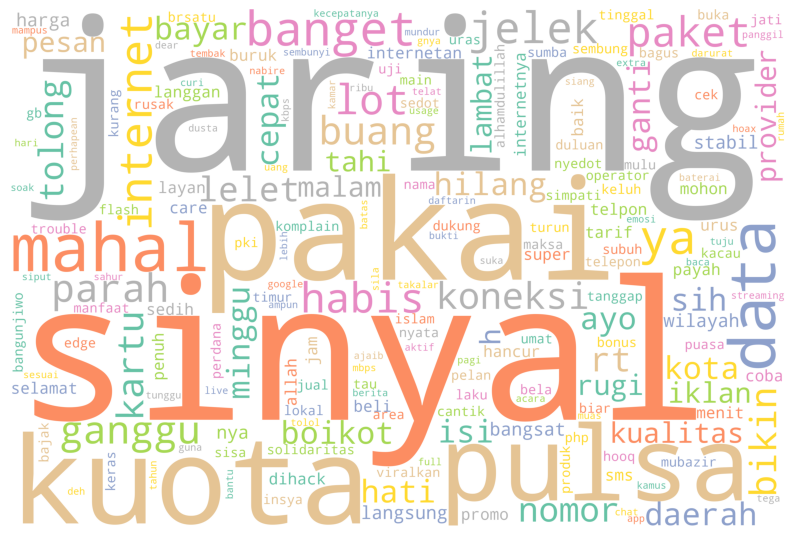

In [85]:


negative_comment = data[data.Sentiment == 'negative']
negative_string = []

for t in negative_comment.clean_teks:
  negative_string.append(t)

negative_string = pd.Series(negative_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, 
                                background_color='white', colormap='Set2', collocations=False, 
                                stopwords = STOPWORDS).generate(negative_string)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Machine Learning Deep Learning


In [77]:
# Test and train split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [78]:
vocab_size = 10_000
max_length = 10_000
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(y_train)
testing_labels = np.array(y_test)

In [79]:
# Save the word index dictionary
np.save('word_index.npy', word_index)

# Save Tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [80]:
embedding_dim = 16

# Initialize the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10000, 16)         160000    
                                                                 
 flatten (Flatten)           (None, 160000)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               20480128  
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 20673281 (78.86 MB)
Trainable params: 20

In [81]:
# Difine the callbacks
# Save the best model
checkpoint_callback = ModelCheckpoint(filepath="Basic Model Embeding Layers.h5", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)

# Early stopping
early_stopping_callback = EarlyStopping(monitor="val_accuracy", mode="max", patience=10, verbose=1, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

# Callbacks list
callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [82]:
# Define the number of epochs
num_epochs = 100

# Train the model
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), callbacks=callbacks)

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 0.8454 - accuracy: 0.5375
Epoch 1: val_accuracy improved from -inf to 0.55000, saving model to Basic Model Embeding Layers.h5
10/10 [==============================] - 4s 316ms/step - loss: 0.8454 - accuracy: 0.5375 - val_loss: 0.7205 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 0.7138 - accuracy: 0.4938
Epoch 2: val_accuracy did not improve from 0.55000
10/10 [==============================] - 2s 215ms/step - loss: 0.7138 - accuracy: 0.4938 - val_loss: 0.7466 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 0.6948 - accuracy: 0.5000
Epoch 3: val_accuracy did not improve from 0.55000
10/10 [==============================] - 2s 208ms/step - loss: 0.6948 - accuracy: 0.5000 - val_loss: 0.6884 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 0.7029 - acc

In [83]:
# Evaluate the model
results_base = model.evaluate(testing_padded, testing_labels)

# print results
print(f'Test results - Loss: {results_base[0]} - Accuracy: {100*results_base[1]}%')

3/3 [==============================] - 0s 21ms/step - loss: 0.4771 - accuracy: 0.8875
Test results - Loss: 0.4770573079586029 - Accuracy: 88.7499988079071%


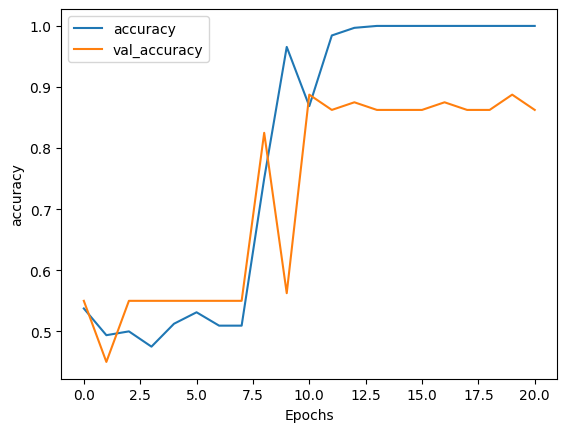

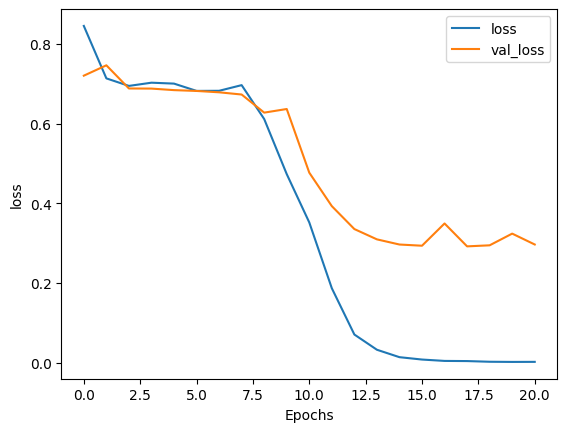

In [84]:
# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [85]:
# Load all model
BiLSTM1L_Model = tf.keras.models.load_model('Basic Model Embeding Layers.h5')

In [93]:
twt = ['Bangga sama suami yg selalu ingat istri']
twt = tokenizer.texts_to_sequences(twt)
twt = pad_sequences(twt, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Predict the sentiment
prediction = BiLSTM1L_Model.predict(twt)

# Print the prediction
if(np.argmax(prediction) == 0):
    print("Negative")
elif (np.argmax(prediction) == 1):
    print("Positive")

1/1 [==============================] - 0s 47ms/step
Negative
